# Part II: Dataset

## 1. Dataset Description

In [74]:
import pandas as pd

***Description***

We are utilizing the [S&P 500 stock data](https://www.kaggle.com/datasets/camnugent/sandp500) dataset from Kaggle for our analysis. This dataset, last updated in 2018, is a comprehensive collection of historical stock prices for all companies currently listed on the S&P 500 index. The data spans a period of 5 years, providing a rich source of information for our study.

The dataset is well-structured and can be divided to analyze each individual company separately. This is facilitated by the `individual_stocks_5yr` folder, which contains data files for individual stocks. Each file is labelled by the respective company's stock ticker name, making it easy to locate and analyze data for a specific company.

Each file in the dataset contains the following columns:

- `Date`: This column records the date of the trading day in the format: yy-mm-dd. It allows us to track the stock's performance over time.
- `Open`: This column records the price of the stock at market open. This data is from the NYSE, so all prices are in USD. It provides a starting point for the day's trading.
- `High`: This column records the highest price the stock reached during the trading day. It gives us an idea of the stock's potential for the day.
- `Low`: This column records the lowest price the stock reached during the trading day. It provides insight into the stock's risk for the day.
- `close` : Closing price of the stock at the end of the trading day. Tt is a commonly used reference point for investors to assess the performance of a particular stock over time.
- `Volume`: This column records the number of shares traded during the trading day. It gives us an idea of the stock's liquidity and popularity.
- `Name`: This column records the ticker name of the stock. It allows us to identify the stock.

To provide a more focused context for this project, our team has chosen to analyze a specific company - Apple, one of the world's largest technology companies. Its stock is listed on the index as AAPL. The dataset we're using for this analysis is named `AAPL_data.csv`. Following is an overview visualization of the dataset:

In [75]:
df = pd.read_csv("dataset/AAPL_data.csv")
#df = pd.read_csv("dataset/FB_data.csv")
#df = pd.read_csv("dataset/GOOG_data.csv")
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


A noteworthy characteristic of this dataset is the data column. Notably, the date `08-02-2013` falls on a Friday, and the subsequent date in the dataset, `11-02-2013`, is a Monday. This suggests that the data is recorded only on **weekdays**.

***Key Features***

Some statistic about this dataset: 

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1259 non-null   object 
 1   open    1259 non-null   float64
 2   high    1259 non-null   float64
 3   low     1259 non-null   float64
 4   close   1259 non-null   float64
 5   volume  1259 non-null   int64  
 6   Name    1259 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 69.0+ KB


In [77]:
df.describe()

,open,high,low,close,volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,109.055429,109.951118,108.141589,109.066698,5.404790e+07
std,30.549220,30.686186,30.376224,30.556812,3.346835e+07
min,55.424200,57.085700,55.014200,55.789900,1.147592e+07
25%,84.647800,85.334950,84.250650,84.830650,2.969438e+07
50%,108.970000,110.030000,108.050000,109.010000,4.566893e+07
75%,127.335000,128.100000,126.290000,127.120000,6.870872e+07
max,179.370000,180.100000,178.250000,179.260000,2.668336e+08


Originally, there is no null value

In [78]:
df.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In this project context, we are working with time seri analysis so we just need to use two columns: `date` and `close`.

In [79]:
df = df[['date', 'close']]
df.head()

,date,close
0,2013-02-08,67.8542
1,2013-02-11,68.5614
2,2013-02-12,66.8428
3,2013-02-13,66.7156
4,2013-02-14,66.6556


QQ Plot

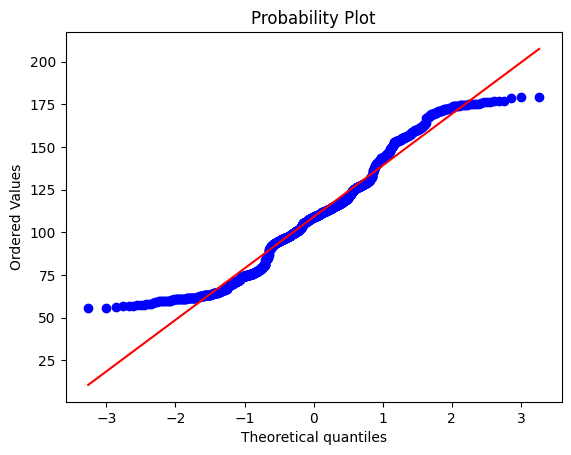

In [80]:
import scipy.stats 
import pylab

#Plot the QQ plot
scipy.stats.probplot(df['close'], dist="norm", plot=pylab)
pylab.show()

A Q-Q (quantile-quantile) plot is a graphical tool that helps us assess if a dataset follows a particular theoretical distribution. It plots the quantiles of the dataset against the quantiles of the chosen theoretical distribution.

If the data follows the chosen distribution, the points in the Q-Q plot will approximately lie on the line y = x. If the data does not follow the distribution, the points will deviate from this line.

&rarr; Some observation of `close` deviate significantly for the linear line indicating that the stock price does not follow the Normal Distribution

## 2. Preprocessing

### 1. Set the data column as index

Set the `date` column of the DataFrame df as the index of the DataFrame

In [81]:
# Ensure that 'date' is a datetime object
df['date'] = pd.to_datetime(df['date'])

# Set 'date' as the index
df.set_index('date', inplace=True)


`inplace=True`: specifies that the operation should be performed on the DataFrame df itself, rather than returning a new DataFrame with the specified changes

By setting the index, we are essentially specifying which column should be used to label/indentify the rows of the DataFrame.

The date column in this dataset is already in the default format: mm/dd/yyyy. However, if another dataset uses the format dd/mm/yyyy, we would need to specify the parameter dayfirst=True.

Look again the dataset, now the `date` was marked as index instead of a numerical order column as previous

In [82]:
df.head()

,close
date,
2013-02-08,67.8542
2013-02-11,68.5614
2013-02-12,66.8428
2013-02-13,66.7156
2013-02-14,66.6556


Start date and End date

In [83]:
df.index.min(), df.index.max()

(Timestamp('2013-02-08 00:00:00'), Timestamp('2018-02-07 00:00:00'))

*`date` is now index so we can not use df[`date`] anymore*

### 2. Set the frequency

All time periods must be equals and clearly definded, which would result in a constant Frequency

As highlighted in the previous section, the data is recorded exclusively on weekdays. Therefore, we will set the frequency to 'business day', denoted as `B` which is from Monday to Friday.

In [84]:
# Set the frequency of the DataFrame index
df = df.asfreq('B') # 'B' is the business day frequency

Check agin the null value in the dataset

In [85]:
df.isnull().sum()

close    45
dtype: int64

We observe 45 missing values, which is unexpected. As previously mentioned, the original dataset records dates only on weekdays. Therefore, when we set the frequency to 'B' for business days, we shouldn't encounter any missing values. To investigate this discrepancy, we will print out these missing values.

In [86]:
# Find the dates where 'Close' is null
missing_dates = df[df['close'].isnull()].index

# Print out the missing dates and the day of the week
for date in missing_dates:
    print(f"Date: {date}, Day of Week: {date.day_name()}")

Date: 2013-02-18 00:00:00, Day of Week: Monday
Date: 2013-03-29 00:00:00, Day of Week: Friday
Date: 2013-05-27 00:00:00, Day of Week: Monday
Date: 2013-07-04 00:00:00, Day of Week: Thursday
Date: 2013-09-02 00:00:00, Day of Week: Monday
Date: 2013-11-28 00:00:00, Day of Week: Thursday
Date: 2013-12-25 00:00:00, Day of Week: Wednesday
Date: 2014-01-01 00:00:00, Day of Week: Wednesday
Date: 2014-01-20 00:00:00, Day of Week: Monday
Date: 2014-02-17 00:00:00, Day of Week: Monday
Date: 2014-04-18 00:00:00, Day of Week: Friday
Date: 2014-05-26 00:00:00, Day of Week: Monday
Date: 2014-07-04 00:00:00, Day of Week: Friday
Date: 2014-09-01 00:00:00, Day of Week: Monday
Date: 2014-11-27 00:00:00, Day of Week: Thursday
Date: 2014-12-25 00:00:00, Day of Week: Thursday
Date: 2015-01-01 00:00:00, Day of Week: Thursday
Date: 2015-01-19 00:00:00, Day of Week: Monday
Date: 2015-02-16 00:00:00, Day of Week: Monday
Date: 2015-04-03 00:00:00, Day of Week: Friday
Date: 2015-05-25 00:00:00, Day of Week: Mond

None of the missing values fall on weekends, suggesting they might correspond to holidays or other non-trading days not included in the original dataset. Initially, these dates were not present in the dataset. However, when we resampled the data to business day frequency, these missing dates emerged.

Now we deal with the remainder missing values with the help of fillna() method. This method go through the dataset and fill out the missing values by different ways:

- Front Filling: Assign the value of the previous period. Ex: the day 8/1 is missing then it will be assigned the value of the day 7/1
- Back Filling:..........
- Assigning the same value: Assign the average to all the missing values within the timeseries. usually, filling by this way is not recommend in time seri since there are underlying time variance patterns in the data.



In [87]:
# Handle any missing values that may have been introduced by asfreq
df['close'].interpolate(method='time', inplace=True)
df.isnull().sum()

/tmp/ipykernel_19390/1446985660.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['close'].interpolate(method='time', inplace=True)


close    0
dtype: int64

### 3. Normalize the data


In time series analysis, normalization is a crucial preprocessing step that involves adjusting the values in the series to a common scale. When we normalize a set of values, we typically transform each value to a ratio relative to the first value in the series. This is done by dividing each value in the series by the first value.

For example, if we have a time series [100, 105, 110, 120], normalizing this series by the first value would result in [1, 1.05, 1.1, 1.2]. Here, each value represents the proportion of the original value relative to the first value.

The resulting normalized series is much easier to compare with other time series, especially when the original series have different scales or units. This is because normalization removes the effect of the scale of the values, allowing us to focus on the underlying patterns and trends.

In practical terms, normalization can be particularly useful in financial analysis. By normalizing two or more time series representing the prices of different assets, we can compare their performance relative to each other. This can help us make investment decisions, such as which asset to invest in and which one to avoid, based on their relative performance rather than their absolute price levels.

Consider example with Apple (AAPL) and Samsung. If the price of AAPL increases by $100 from an original price of $1000, this represents a 10% increase. On the other hand, if the price of Samsung increases by $80 from an original price of $100, this represents an 80% increase.

Even though the absolute increase in the price of AAPL ($100) is larger than the increase in the price of Samsung ($80), the relative increase (or return) is actually much larger for Samsung. This means that, in terms of percentage, an investment in Samsung would have yielded a higher return.

This is why we normalize time series data - it allows us to compare the relative changes in different series, regardless of their absolute levels. By doing so, we can make more informed decisions about which investments are likely to yield the highest returns.

In [88]:
# Scale by the first value of the series
benchmark = df['close'].iloc[0]
df['normalized'] = df['close'].div(benchmark).mul(100)   
df.head()

,close,normalized
date,,
2013-02-08,67.8542,100.000000
2013-02-11,68.5614,101.042235
2013-02-12,66.8428,98.509451
2013-02-13,66.7156,98.321990
2013-02-14,66.6556,98.233565


Also, normalize will not affect the model performance


In [89]:
column_used = 'normalized'

### 3. Check Stationary

#### 1. Visualize

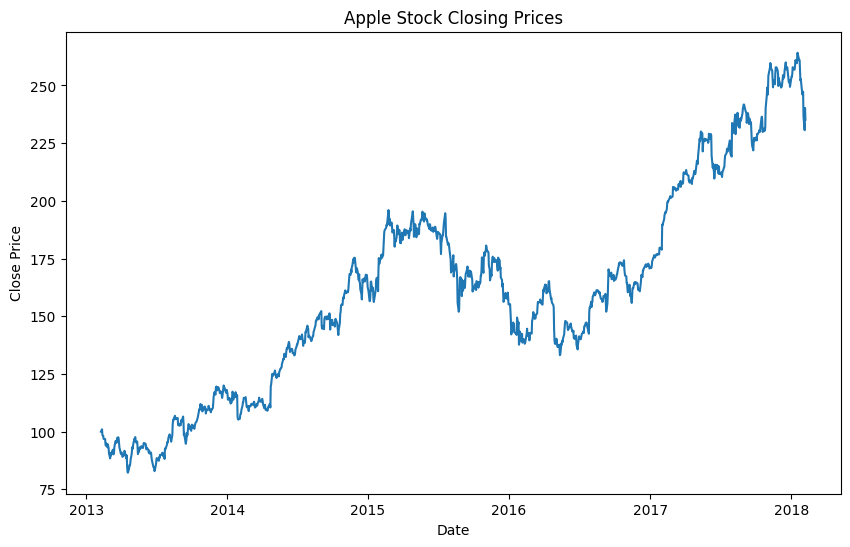

In [90]:
import matplotlib.pyplot as plt


# Plot the closing prices
plt.figure(figsize=(10, 6))
plt.plot(df[column_used])
plt.title('Apple Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

#### 2. Decomposite

https://www.youtube.com/watch?v=4Vq8KqbHKh8

https://www.youtube.com/watch?v=1NXryMoU7Ho

https://www.youtube.com/watch?v=l_EDA7rDH3s&list=PLtIY5kwXKny91_IbkqcIXuv6t1prQwFhO&index=5

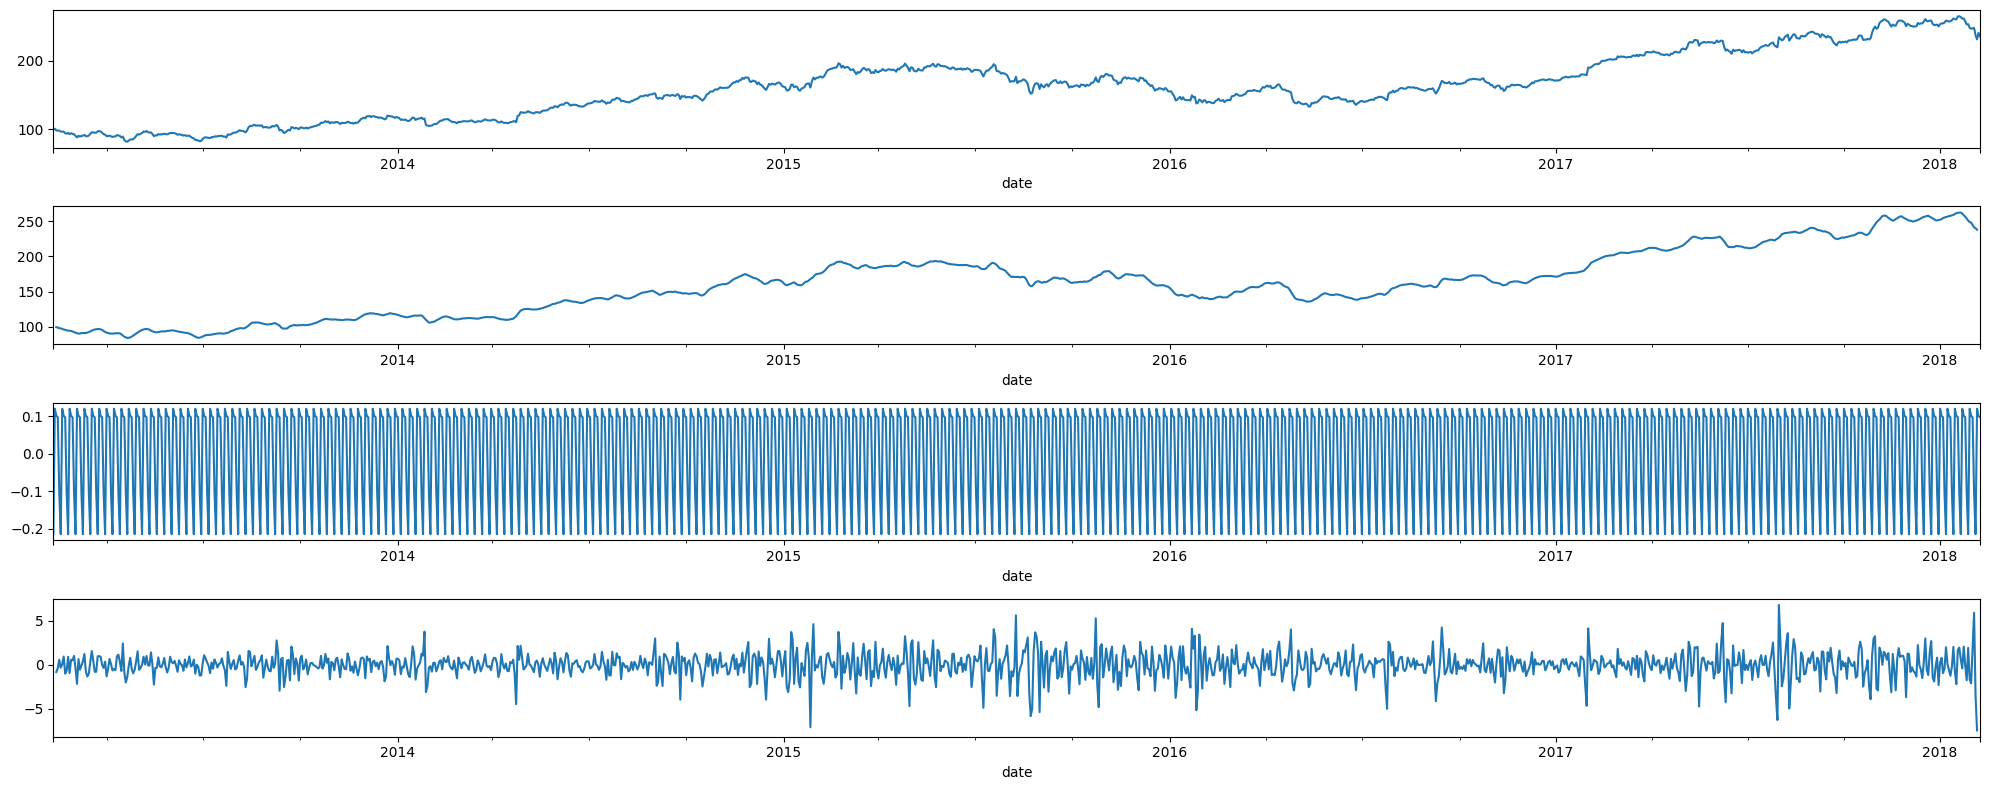

In [91]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Decompose the time series
result = seasonal_decompose(df[column_used].dropna(), model='additive')
#result = seasonal_decompose(df['close'], model='multiplicative')

# Get the figure and axes for the plot
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(20,8))

# Plot the original series, trend, seasonal component, and residuals 
result.observed.plot(ax=ax1)
result.trend.plot(ax=ax2)
result.seasonal.plot(ax=ax3)
result.resid.plot(ax=ax4)

# Show the plot
plt.tight_layout()
plt.show()

- The Trend graph indicates there is trend in our time seri
- The Seasonality graph indicates there is no sensonality in our time seri
- Using Residual graph to detect any anomalies/outlies.

Check for anomaly

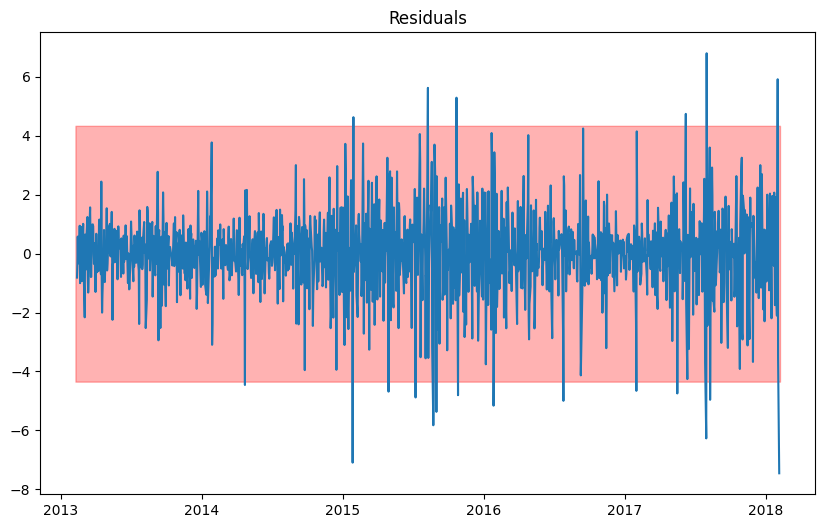

In [92]:
resid_mu = result.resid.mean()
resid_std = result.resid.std()

threshold = 3
lower_bound = resid_mu - threshold*resid_std
upper_bound = resid_mu + threshold*resid_std

plt.figure(figsize=(10, 6))
plt.plot(result.resid)
plt.fill_between(result.resid.index, lower_bound, upper_bound, color='red', alpha=0.3)
plt.title('Residuals')
plt.show()

Choosing a threshold for anomaly detection often depends on the specific context and the nature of your data. A common approach is to use the standard deviation, with any data point more than 3 standard deviations away from the mean considered an anomaly. However, this might not be suitable for all datasets, especially if the data is not normally distributed.

In terms of handling anomalies, it again depends on the context:

1. **If the anomalies are errors or noise:** If you believe the anomalies are due to errors, noise, or outliers that are not representative of your underlying data, you might choose to remove or correct them. For example, if you're analyzing sales data and an anomaly is due to a data entry error, it might make sense to correct or remove that data point.

2. **If the anomalies are significant events:** If the anomalies represent significant events or behaviors, you might choose to keep them. For example, in stock market data, a significant drop or rise in price could be an important event that you wouldn't want to remove.

3. **For predictive modeling:** If you're building a predictive model, you might choose to keep the anomalies but create a separate binary feature indicating whether a data point is an anomaly. This can help the model learn both the general trend and the anomalies.

Remember, the key is understanding your data and the reason for the anomalies, and then making an informed decision based on that understanding.

Print out anomalies days in data

In [93]:
# Create a mask for anomalies
anomaly_mask = (result.resid < lower_bound) | (result.resid > upper_bound)

# Get the dates of the anomalies
anomaly_dates = result.resid.index[anomaly_mask]

# Print the anomaly dates
print(anomaly_dates)

DatetimeIndex(['2014-04-23', '2015-01-27', '2015-01-29', '2015-04-30',
               '2015-07-09', '2015-08-10', '2015-08-24', '2015-08-25',
               '2015-09-01', '2015-10-23', '2015-10-27', '2016-01-27',
               '2016-07-26', '2017-01-31', '2017-05-17', '2017-06-08',
               '2017-07-31', '2017-08-01', '2017-08-10', '2018-02-01',
               '2018-02-05'],
              dtype='datetime64[ns]', name='date', freq=None)


Handle these anomalies ?????

#### 3. ADF Test

https://www.youtube.com/watch?v=l_EDA7rDH3s&list=PLtIY5kwXKny91_IbkqcIXuv6t1prQwFhO&index=5

ADF test then use difference to time seri, then test again

In [94]:
from statsmodels.tsa.stattools import adfuller

# Stationarity check
def check_stationarity(timeseries):
    result = adfuller(timeseries)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

check_stationarity(df[column_used])




ADF Statistic: -0.660437
p-value: 0.856733
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


If p-value > 0.05, the series is not stationary.In that case, you need to make the series stationary. 

- Differencing: This method involves calculating the difference between consecutive observations. This is often effective at removing a trend. In Python, you can use the diff() function in pandas to apply differencing.


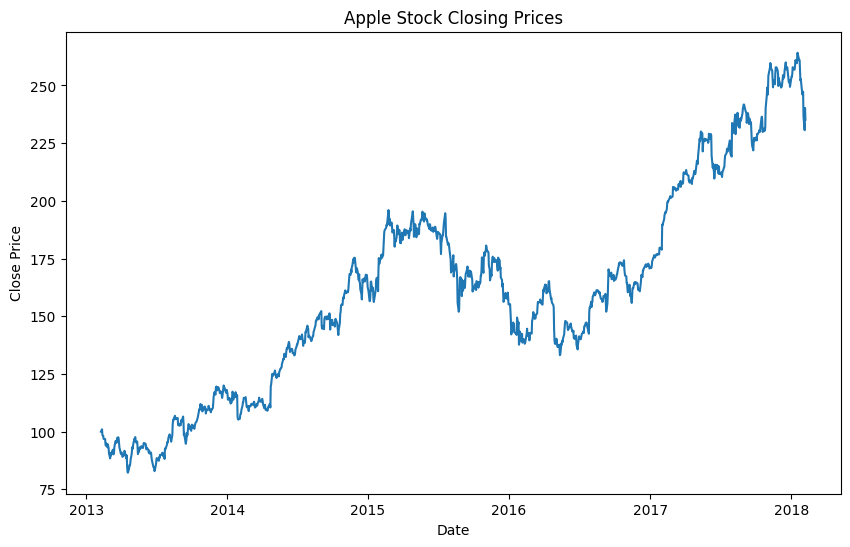

In [95]:
# Plot the origin closing prices
plt.figure(figsize=(10, 6))
plt.plot(df[column_used])
plt.title('Apple Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

### Differencing

In [96]:
# Making the series stationary by differencing
df['differ1'] = df[column_used].diff(1)
df = df.iloc[1:] # Drop the first row since it will 
#be NaN (The first period will have no previous value to minus so it will be null)
# Check stationarity of the differenced series
check_stationarity(df['differ1'].dropna())

ADF Statistic: -17.326398
p-value: 0.000000
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


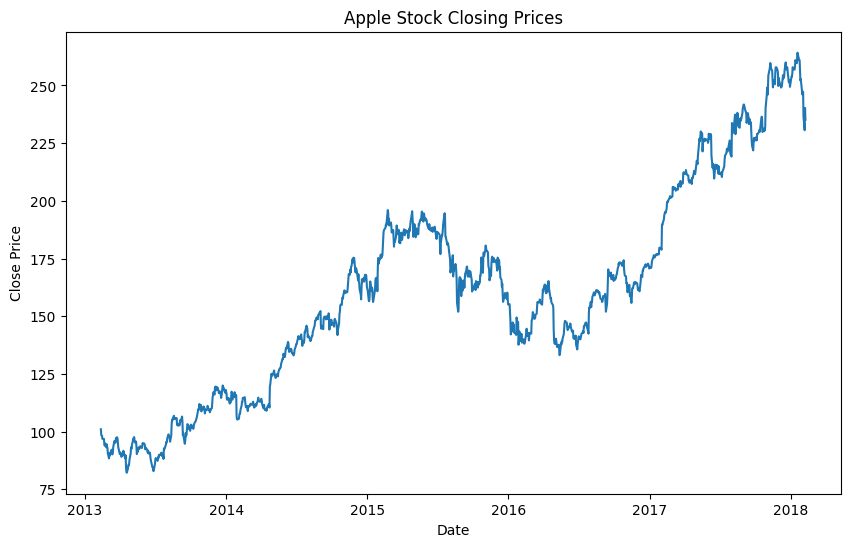

In [97]:
# Plot the closing prices
plt.figure(figsize=(10, 6))
plt.plot(df[column_used])
plt.title('Apple Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

This seem to be fine since the time seri is now stationary, but if we investigate more, the time seri is now becoming a white noise.

In [98]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Ljung-Box test
result = acorr_ljungbox(df['differ1'].dropna(), lags=[10, 20, 30], return_df=True)
print(result)

# Check for white noise
is_white_noise = result['lb_pvalue'].iloc[-1] > 0.05

if is_white_noise:
    print("The time series is likely white noise.")
else:
    print("The time series is not likely white noise.")


      lb_stat  lb_pvalue
10  11.224603   0.340289
20  27.017072   0.134784
30  36.965348   0.178156
The time series is likely white noise.


There for, we can observe the ACF and PACF having no autocorrelation

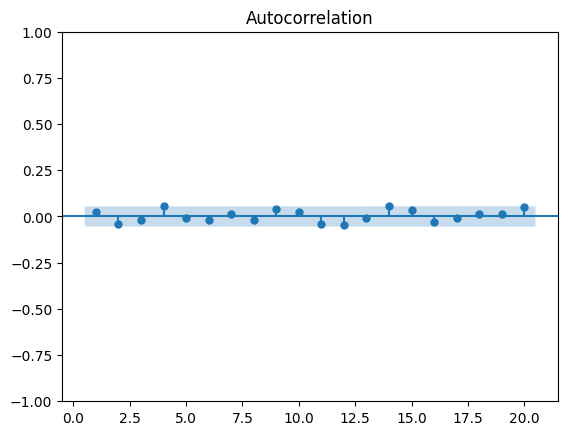

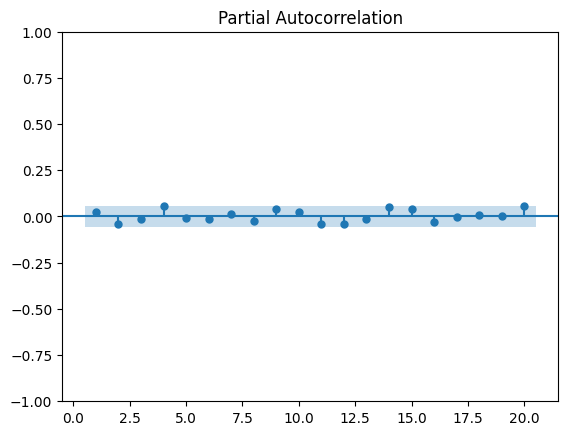

In [99]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df['differ1'].dropna(), lags=20, zero=False)
plot_pacf(df['differ1'].dropna(), lags=20, zero=False)
plt.show()

In this case, first-order differencing (differencing by 1) and the resulting series appears to be white noise, it might indicate that the differencing removed too much of the structure, or the original series did not have strong autocorrelations to begin with. So we try another differ.

(The trend is not linear so different = 1 will not efficientt)

In [100]:
number_of_diff = 2

In [101]:
# Making the series stationary by differencing
df['differ'+ str(number_of_diff)] = df[column_used].diff(number_of_diff).dropna()
#df = df.iloc[1:] # Drop the first row since it will 
#be NaN (The first period will have no previous value to minus so it will be null)
# Check stationarity of the differenced series
check_stationarity(df['differ'+ str(number_of_diff)].dropna())

#Ljung-Box test
result = acorr_ljungbox(df['differ'+ str(number_of_diff)].dropna(), lags=[10, 20, 30], return_df=True)
print(result)

# Check for white noise
is_white_noise = result['lb_pvalue'].iloc[-1] > 0.05

if is_white_noise:
    print("The time series is likely white noise.")
else:
    print("The time series is not likely white noise.")


ADF Statistic: -7.469759
p-value: 0.000000
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
       lb_stat     lb_pvalue
10  326.413563  3.996189e-64
20  350.074492  4.300175e-62
30  362.537781  9.699117e-59
The time series is not likely white noise.


The time seri now is stationary and also not white noise

In [102]:
df.head(10)

,close,normalized,differ1,differ2
date,,,,
2013-02-11,68.561400,101.042235,1.042235,NaN
2013-02-12,66.842800,98.509451,-2.532784,NaN
2013-02-13,66.715600,98.321990,-0.187461,-2.720244
2013-02-14,66.655600,98.233565,-0.088425,-0.275886
2013-02-15,65.737100,96.879928,-1.353638,-1.442063
2013-02-18,65.718875,96.853069,-0.026859,-1.380497
2013-02-19,65.712800,96.844116,-0.008953,-0.035812
2013-02-20,64.121400,94.498793,-2.345323,-2.354276
2013-02-21,63.722800,93.911357,-0.587436,-2.932759


Original Series


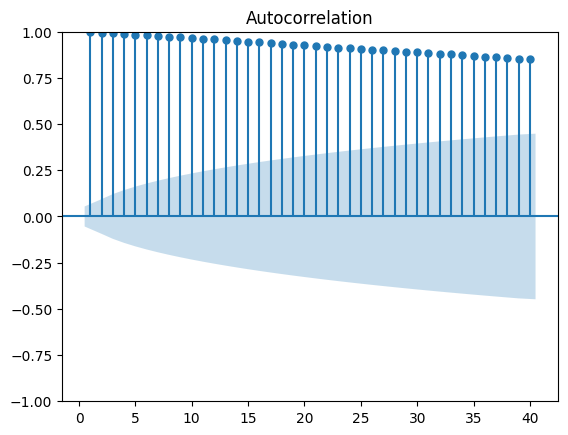

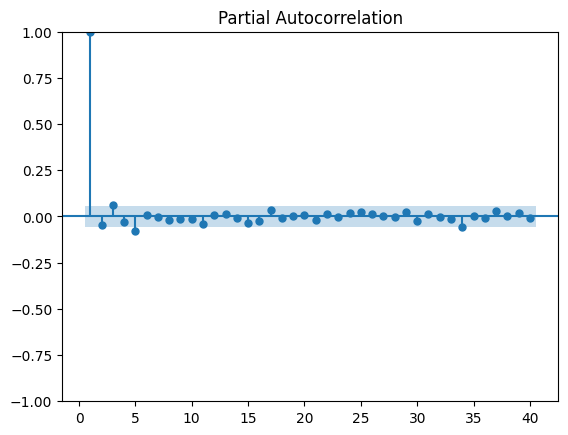

Series after Differenced 2


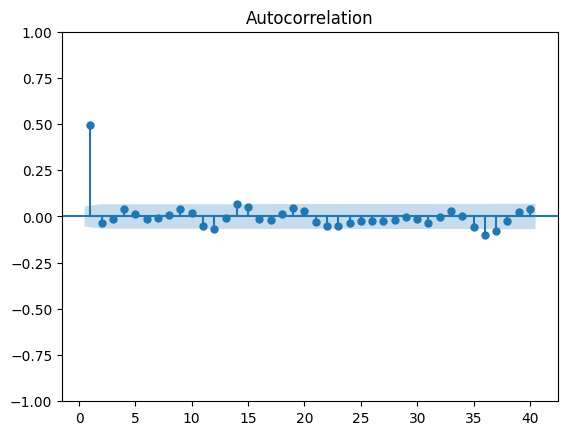

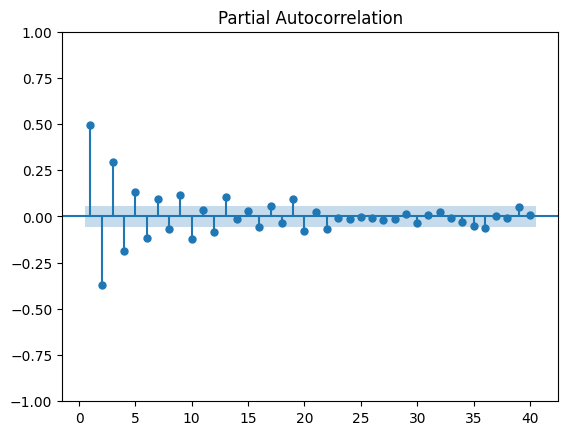

In [103]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

print("Original Series")
plot_acf(df[column_used].dropna(), lags=40, zero=False)
plot_pacf(df[column_used].dropna(), lags=40, zero=False)
plt.show()


print("Series after Differenced " + str(number_of_diff))
plot_acf(df['differ'+ str(number_of_diff)].dropna(), lags=40, zero=False)   
plot_pacf(df['differ'+ str(number_of_diff)].dropna(), lags=40, zero=False)
plt.show()

In [104]:
#From now, we use the differenced 2 
column_used = 'differ'+ str(number_of_diff)
df = df.dropna()
df.head()

,close,normalized,differ1,differ2
date,,,,
2013-02-13,66.715600,98.321990,-0.187461,-2.720244
2013-02-14,66.655600,98.233565,-0.088425,-0.275886
2013-02-15,65.737100,96.879928,-1.353638,-1.442063
2013-02-18,65.718875,96.853069,-0.026859,-1.380497
2013-02-19,65.712800,96.844116,-0.008953,-0.035812


### 4. Spliting the dateset

An importance note that timeseries data relies on keeping the chronological order/ time order of the values. Therefore, data in timeseries should be uninterrupted sequences of values →The training set should include all values from the beggining to a specific point in time 

In [105]:
size = int(len(df)*0.8)
df_train = df.iloc[:size]  #df is the training set, account for 80% of the dataset
df_test = df.iloc[size:]

Check for two new set

In [106]:
df_train.tail()

,close,normalized,differ1,differ2
date,,,,
2017-02-01,128.75,189.745071,10.905736,10.493087
2017-02-02,128.53,189.420846,-0.324225,10.581512
2017-02-03,129.08,190.231408,0.810561,0.486337
2017-02-06,130.29,192.014643,1.783235,2.593797
2017-02-07,131.53,193.842091,1.827448,3.610683


In [107]:
df_test.head()

,close,normalized,differ1,differ2
date,,,,
2017-02-08,132.04,194.593702,0.751612,2.579059
2017-02-09,132.42,195.153727,0.560024,1.311636
2017-02-10,132.12,194.711602,-0.442124,0.117900
2017-02-13,133.29,196.435888,1.724285,1.282161
2017-02-14,135.02,198.985472,2.549584,4.273870


## 3. Hyperparameter

In [108]:
df.head()

,close,normalized,differ1,differ2
date,,,,
2013-02-13,66.715600,98.321990,-0.187461,-2.720244
2013-02-14,66.655600,98.233565,-0.088425,-0.275886
2013-02-15,65.737100,96.879928,-1.353638,-1.442063
2013-02-18,65.718875,96.853069,-0.026859,-1.380497
2013-02-19,65.712800,96.844116,-0.008953,-0.035812


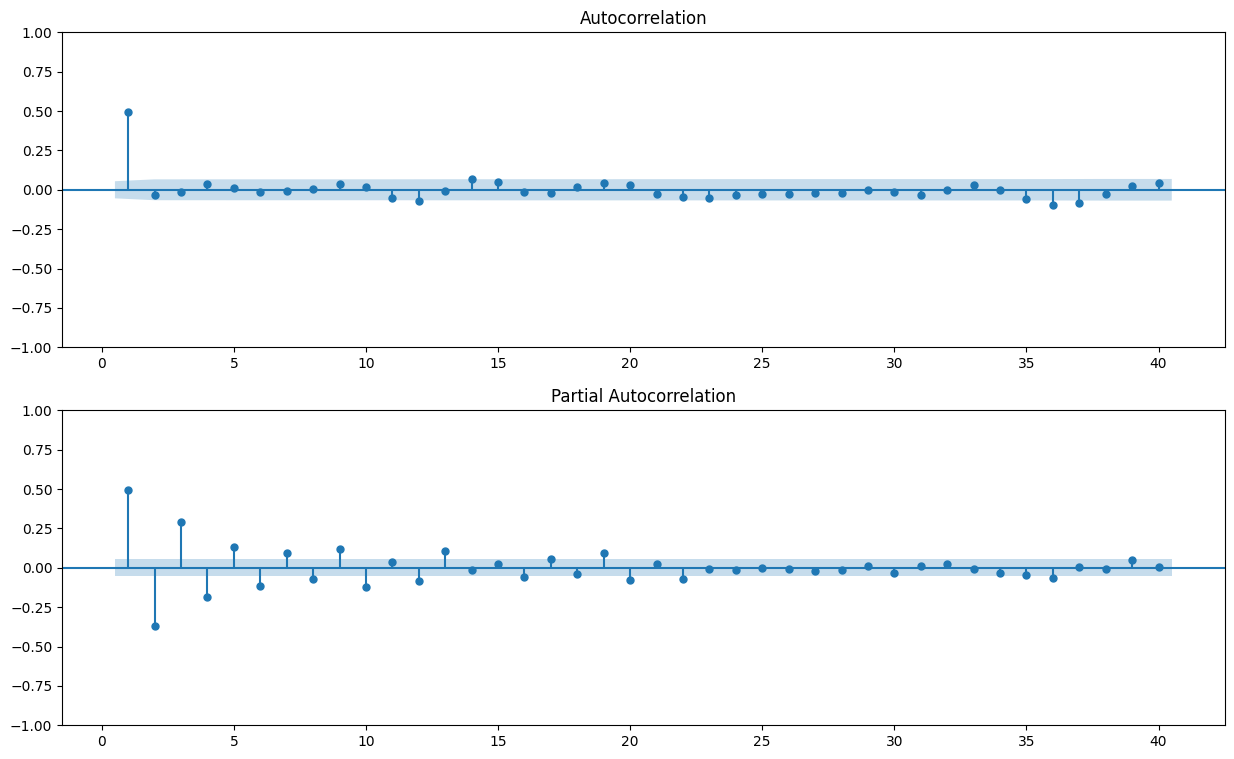

In [109]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


series = df[column_used]

# Create figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,9))

# Plot ACF
plot_acf(series, ax= ax1, lags=40, zero=False) #zero=False to remove the lag 0 correlation (1.0) from the plot

# Plot PACF
plot_pacf(series, ax=ax2, lags=40, zero=False)

# Show the plot
plt.show()

One lags with significant greater than 0 should be added to the model. PACF helps to decide PACF in AR model while ACF is for MA model. Between AR and MA, we should choose simpler model (model using fewer lags). Unless the complex model provides significant better prediction. To measure that 'significant' we use Log-likelihood ratio test (for models with different lags) or AIC, BIC (for models with same lags).
If our model fir well there should be no trend we fail to account for, the residual for the model should resemble white noise (NO patterns we have missed when overtraining)

**How to choose the model**

- Lags with significant greater than 0: In time series analysis, a "lag" is a fixed period of time that we look back to find patterns. If a lag has a significant value (greater than 0), it means that it has a strong correlation with the current value and should be included in the model.

- PACF and ACF: The Partial Autocorrelation Function (PACF) and Autocorrelation Function (ACF) are tools used to find the optimal number of lags in an Autoregressive (AR) or Moving Average (MA) model, respectively.

- Choosing between AR and MA models: Generally, it's better to choose the simpler model (the one using fewer lags) unless a more complex model provides significantly better predictions.

- Log-likelihood ratio test, AIC, BIC: These are statistical tests used to compare the goodness of fit of different models. The Log-likelihood ratio test is used when the models have different numbers of lags, while the Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC) are used when the models have the same number of lags. We should still prefer the simpler model, unless the complex once provided a significant better result measured by Log-likelihood, AIC, BIC.

- Residuals and white noise: The residuals of a model are the differences between the observed and predicted values. If a model fits the data well, the residuals should resemble "white noise". This means they should be random, have a mean of 0, and have no discernible patterns or trends. This is because any pattern or trend in the residuals would suggest that the model has failed to capture some underlying structure in the data.

- Overfitting: Overfitting occurs when a model is too complex and starts to capture the noise in the data along with the underlying pattern. This can lead to poor predictive performance on new data. If the residuals show a pattern when overfitting, it means the model is capturing the noise in the data, which should ideally be random.

The lollipop plot that you see above is the ACF and PACF results. To estimate the amount of AR terms, you need to look at the PACF plot. First, ignore the value at lag 0. It will always show a perfect correlation, since we are estimating the correlation between today’s value with itself. Note that there is a blue area in the plot, representing the confidence interval. To estimate how much AR terms you should use, start counting how many “lollipop” are above or below the confidence interval before the next one enter the blue area.

So, looking at the PACF plot above, we can estimate to use 3 AR terms for our model, since lag 1, 2 and 3 are out of the confidence interval, and lag 4 is in the blue area.

In [110]:
### 4. Spliting the dateset
size = int(len(df)*0.8)
df_train = df.iloc[:size]  #df is the training set, account for 80% of the dataset
df_test = df.iloc[size:]
df_train.tail()
df_test.head()

,close,normalized,differ1,differ2
date,,,,
2017-02-08,132.04,194.593702,0.751612,2.579059
2017-02-09,132.42,195.153727,0.560024,1.311636
2017-02-10,132.12,194.711602,-0.442124,0.117900
2017-02-13,133.29,196.435888,1.724285,1.282161
2017-02-14,135.02,198.985472,2.549584,4.273870


# AR Model

In [111]:
from statsmodels.tsa.arima.model import ARIMA

# Create the AR model
def train_ar_model(df_train, order):
    # Create the ARIMA model
    model = ARIMA(df_train[column_used], order=order)
    # Fit the model
    result = model.fit()
    print("Result for AR(%d)" % order[0])
    print(result.summary())
    return result

The P>|z| column in the summary output represents the p-values for the coefficients. The p-value for a particular coefficient tests the null hypothesis that the coefficient is equal to zero (no effect). A low p-value (< 0.05) indicates that you can reject the null hypothesis. In other words, a predictor that has a low p-value is likely to be a meaningful addition to your model because changes in the predictor's value are related to changes in the response variable.

In [112]:
result_ar_1 = train_ar_model(df_train, (1,0,0))

Result for AR(1)
                               SARIMAX Results                                
Dep. Variable:                differ2   No. Observations:                 1040
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -2492.438
Date:                Wed, 19 Jun 2024   AIC                           4990.877
Time:                        12:51:17   BIC                           5005.718
Sample:                    02-13-2013   HQIC                          4996.507
                         - 02-07-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1792      0.168      1.069      0.285      -0.149       0.508
ar.L1          0.5051      0.019     26.260      0.000       0.467       0.543
sigma2         7.0639      0.207   

In [113]:
result_ar_2 = train_ar_model(df_train, (2,0,0))

Result for AR(2)
                               SARIMAX Results                                
Dep. Variable:                differ2   No. Observations:                 1040
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -2420.844
Date:                Wed, 19 Jun 2024   AIC                           4849.689
Time:                        12:51:17   BIC                           4869.477
Sample:                    02-13-2013   HQIC                          4857.195
                         - 02-07-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1788      0.116      1.546      0.122      -0.048       0.405
ar.L1          0.6863      0.021     33.296      0.000       0.646       0.727
ar.L2         -0.3587      0.022   

In [114]:
train_ar_model(df_train, (3,0,0))

Result for AR(3)
                               SARIMAX Results                                
Dep. Variable:                differ2   No. Observations:                 1040
Model:                 ARIMA(3, 0, 0)   Log Likelihood               -2385.193
Date:                Wed, 19 Jun 2024   AIC                           4780.386
Time:                        12:51:17   BIC                           4805.121
Sample:                    02-13-2013   HQIC                          4789.769
                         - 02-07-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1779      0.151      1.178      0.239      -0.118       0.474
ar.L1          0.7790      0.023     33.706      0.000       0.734       0.824
ar.L2         -0.5355      0.029   

In [115]:
train_ar_model(df_train, (4,0,0))

Result for AR(4)
                               SARIMAX Results                                
Dep. Variable:                differ2   No. Observations:                 1040
Model:                 ARIMA(4, 0, 0)   Log Likelihood               -2355.449
Date:                Wed, 19 Jun 2024   AIC                           4722.899
Time:                        12:51:18   BIC                           4752.581
Sample:                    02-13-2013   HQIC                          4734.158
                         - 02-07-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1742      0.118      1.472      0.141      -0.058       0.406
ar.L1          0.8397      0.023     36.902      0.000       0.795       0.884
ar.L2         -0.6636      0.032   

In [116]:
train_ar_model(df_train, (5,0,0))

Result for AR(5)
                               SARIMAX Results                                
Dep. Variable:                differ2   No. Observations:                 1040
Model:                 ARIMA(5, 0, 0)   Log Likelihood               -2341.952
Date:                Wed, 19 Jun 2024   AIC                           4697.904
Time:                        12:51:18   BIC                           4732.533
Sample:                    02-13-2013   HQIC                          4711.040
                         - 02-07-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1771      0.140      1.266      0.205      -0.097       0.451
ar.L1          0.8776      0.024     36.730      0.000       0.831       0.924
ar.L2         -0.7341      0.035   

In [117]:
train_ar_model(df_train, (6,0,0))

Result for AR(6)
                               SARIMAX Results                                
Dep. Variable:                differ2   No. Observations:                 1040
Model:                 ARIMA(6, 0, 0)   Log Likelihood               -2336.463
Date:                Wed, 19 Jun 2024   AIC                           4688.926
Time:                        12:51:18   BIC                           4728.502
Sample:                    02-13-2013   HQIC                          4703.939
                         - 02-07-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1760      0.127      1.386      0.166      -0.073       0.425
ar.L1          0.8939      0.024     36.942      0.000       0.846       0.941
ar.L2         -0.7719      0.036   

In [118]:
train_ar_model(df_train, (7,0,0))

Result for AR(7)
                               SARIMAX Results                                
Dep. Variable:                differ2   No. Observations:                 1040
Model:                 ARIMA(7, 0, 0)   Log Likelihood               -2327.068
Date:                Wed, 19 Jun 2024   AIC                           4672.136
Time:                        12:51:19   BIC                           4716.659
Sample:                    02-13-2013   HQIC                          4689.026
                         - 02-07-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1776      0.147      1.205      0.228      -0.111       0.467
ar.L1          0.9078      0.025     36.887      0.000       0.860       0.956
ar.L2         -0.8051      0.036   

In [119]:
train_ar_model(df_train, (8,0,0))

Result for AR(8)
                               SARIMAX Results                                
Dep. Variable:                differ2   No. Observations:                 1040
Model:                 ARIMA(8, 0, 0)   Log Likelihood               -2322.983
Date:                Wed, 19 Jun 2024   AIC                           4665.966
Time:                        12:51:19   BIC                           4715.436
Sample:                    02-13-2013   HQIC                          4684.732
                         - 02-07-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1763      0.135      1.305      0.192      -0.088       0.441
ar.L1          0.9197      0.025     36.300      0.000       0.870       0.969
ar.L2         -0.8249      0.037   

In [120]:
train_ar_model(df_train, (9,0,0))

Result for AR(9)
                               SARIMAX Results                                
Dep. Variable:                differ2   No. Observations:                 1040
Model:                 ARIMA(9, 0, 0)   Log Likelihood               -2317.584
Date:                Wed, 19 Jun 2024   AIC                           4657.167
Time:                        12:51:19   BIC                           4711.584
Sample:                    02-13-2013   HQIC                          4677.810
                         - 02-07-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1788      0.151      1.183      0.237      -0.117       0.475
ar.L1          0.9289      0.025     36.733      0.000       0.879       0.979
ar.L2         -0.8467      0.037   

In [121]:
train_ar_model(df_train, (10,0,0))

Result for AR(10)
                               SARIMAX Results                                
Dep. Variable:                differ2   No. Observations:                 1040
Model:                ARIMA(10, 0, 0)   Log Likelihood               -2305.973
Date:                Wed, 19 Jun 2024   AIC                           4635.947
Time:                        12:51:21   BIC                           4695.310
Sample:                    02-13-2013   HQIC                          4658.466
                         - 02-07-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1759      0.130      1.353      0.176      -0.079       0.431
ar.L1          0.9443      0.025     37.883      0.000       0.895       0.993
ar.L2         -0.8741      0.037  

In [122]:
result_ar_10 = train_ar_model(df_train, (10,0,0))

Result for AR(10)
                               SARIMAX Results                                
Dep. Variable:                differ2   No. Observations:                 1040
Model:                ARIMA(10, 0, 0)   Log Likelihood               -2305.973
Date:                Wed, 19 Jun 2024   AIC                           4635.947
Time:                        12:51:22   BIC                           4695.310
Sample:                    02-13-2013   HQIC                          4658.466
                         - 02-07-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1759      0.130      1.353      0.176      -0.079       0.431
ar.L1          0.9443      0.025     37.883      0.000       0.895       0.993
ar.L2         -0.8741      0.037  

In [123]:
result_ar_11 = train_ar_model(df_train, (11,0,0))

Result for AR(11)
                               SARIMAX Results                                
Dep. Variable:                differ2   No. Observations:                 1040
Model:                ARIMA(11, 0, 0)   Log Likelihood               -2303.569
Date:                Wed, 19 Jun 2024   AIC                           4633.139
Time:                        12:51:24   BIC                           4697.449
Sample:                    02-13-2013   HQIC                          4657.535
                         - 02-07-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1770      0.140      1.267      0.205      -0.097       0.451
ar.L1          0.9545      0.025     37.556      0.000       0.905       1.004
ar.L2         -0.8906      0.037  

In [124]:
# Fit the model
result_ar_12 = train_ar_model(df_train, (12,0,0))

# Print p-values for all coefficients
print(result_ar_12.pvalues)

Result for AR(12)
                               SARIMAX Results                                
Dep. Variable:                differ2   No. Observations:                 1040
Model:                ARIMA(12, 0, 0)   Log Likelihood               -2300.241
Date:                Wed, 19 Jun 2024   AIC                           4628.481
Time:                        12:51:31   BIC                           4697.739
Sample:                    02-13-2013   HQIC                          4654.754
                         - 02-07-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1759      0.129      1.364      0.173      -0.077       0.429
ar.L1          0.9600      0.026     37.360      0.000       0.910       1.010
ar.L2         -0.9078      0.038  

In [125]:
# Fit the model
result_ar_13 = train_ar_model(df_train, (13,0,0))

# Print p-values for all coefficients
print(result_ar_13.pvalues)

Result for AR(13)
                               SARIMAX Results                                
Dep. Variable:                differ2   No. Observations:                 1040
Model:                ARIMA(13, 0, 0)   Log Likelihood               -2293.570
Date:                Wed, 19 Jun 2024   AIC                           4617.141
Time:                        12:51:35   BIC                           4691.346
Sample:                    02-13-2013   HQIC                          4645.290
                         - 02-07-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1766      0.146      1.213      0.225      -0.109       0.462
ar.L1          0.9692      0.026     37.216      0.000       0.918       1.020
ar.L2         -0.9243      0.038  

In [126]:
# Fit the model
result_ar_14 = train_ar_model(df_train, (14,0,0))

# Print p-values for all coefficients
print(result_ar_14.pvalues)

Result for AR(14)
                               SARIMAX Results                                
Dep. Variable:                differ2   No. Observations:                 1040
Model:                ARIMA(14, 0, 0)   Log Likelihood               -2292.963
Date:                Wed, 19 Jun 2024   AIC                           4617.925
Time:                        12:51:40   BIC                           4697.077
Sample:                    02-13-2013   HQIC                          4647.951
                         - 02-07-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1766      0.141      1.255      0.209      -0.099       0.452
ar.L1          0.9731      0.026     37.322      0.000       0.922       1.024
ar.L2         -0.9308      0.038  

**Higer lags AR**

**LLR Test**

In [127]:
from scipy.stats.distributions import chi2

def LLR_test(model_1, model_2, degree):
    L1 = model_1.llf
    L2 = model_2.llf
    LR = (degree*(L2-L1))    
    p = chi2.sf(LR, degree).round(3)
    return p

This function takes as input two fitted models (model_1 and model_2) and the degrees of freedom (DF), which is usually 1 when comparing models with one lag difference. It calculates the log likelihood for each model (L1 and L2), computes the log likelihood ratio (LR), and then calculates the p-value of the test. If the p-value is less than 0.05, we can reject the null hypothesis and conclude that model_2 fits the data significantly better than model_1.

In [128]:
p = LLR_test(result_ar_1, result_ar_2, 1)
print('p-value:', p)

p-value: 0.0


In [129]:
p = LLR_test(result_ar_12, result_ar_13,1)
print('p-value:', p)

p-value: 0.01


In [130]:
p = LLR_test(result_ar_1, result_ar_13,12)
print('p-value:', p) 

p-value: 0.0


In [131]:
p = LLR_test(result_ar_13, result_ar_14,1)
print('p-value:', p)

p-value: 0.436


Increase the complexity of the AR model untill AR(n) santisfy

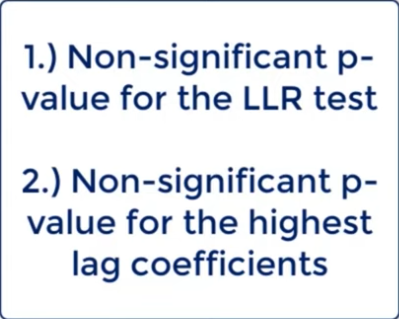

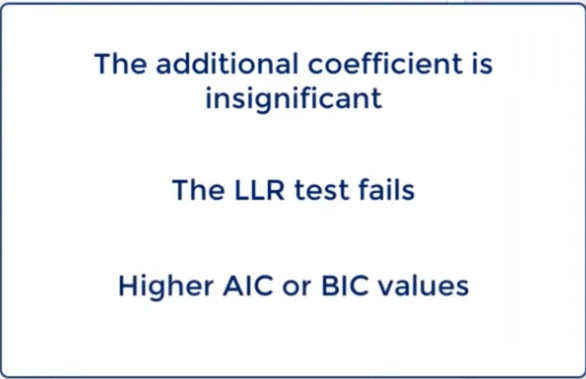

The `LLR_test` function you've defined is used to compare the fit of two models on the same dataset. It doesn't directly involve a testing set. 

The function uses the log-likelihood values (`llf`) from two fitted models (`model_1` and `model_2`). These models should be fitted on your training data.

The testing set is used later, after you've chosen the best model using tools like the LLR test. Once you've selected a model, you use the testing set to evaluate how well your chosen model generalizes to new, unseen data.

Here's a general workflow:

1. Split your data into a training set and a testing set.
2. Fit several models to the training set.
3. Use statistical tests (like the LLR test) and criteria (like AIC and BIC) to compare the fit of these models and select the best one.
4. Use the chosen model to make predictions on the testing set.
5. Evaluate the accuracy of these predictions to assess how well your model is likely to perform on new, unseen data.

### Analysis the Residuals

Component e<sub>t</sub> in AR equation. The optimal is that this resudual is White Noise

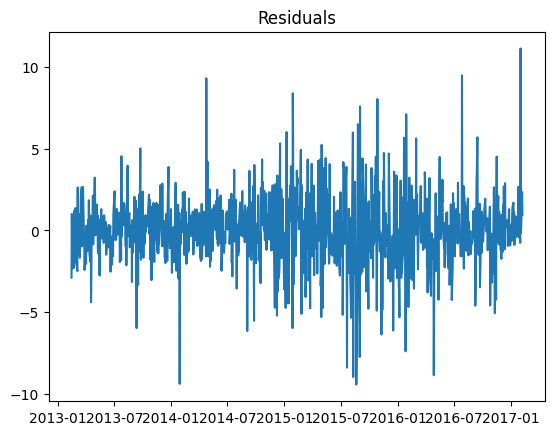

In [132]:
import matplotlib.pyplot as plt

residuals = df[column_used] - result_ar_13.predict()
plt.plot(residuals)
plt.title('Residuals')
plt.show()

In [133]:
#Ljung-Box test
result = acorr_ljungbox(residuals.dropna(), lags=[10, 20, 30], return_df=True)
print(result)

# Check for white noise
is_white_noise = result['lb_pvalue'].iloc[-1] > 0.05

if is_white_noise:
    print("The time series is likely white noise.")
else:
    print("The time series is not likely white noise.")

      lb_stat  lb_pvalue
10   8.640308   0.566545
20  26.283395   0.156655
30  32.761847   0.332970
The time series is likely white noise.


&rarr; error term is White Noise

# MA

r<sub>t</sub> = C + phi<sub>1</sub> e<sub>t-1</sub> + e<sub>t</sub>

e is the residual

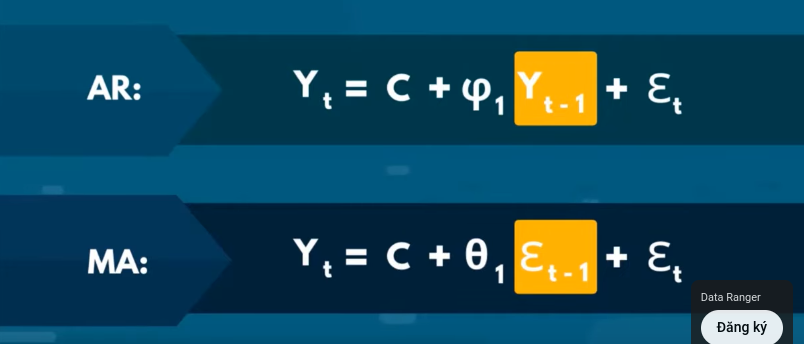

Using ACF to Determine Lag in MA Models

In time series analysis, Moving Average (MA) models are used to model the dependency of an observation on residual errors from a moving average model applied to lagged observations. The key characteristic of MA models is that they depend on past forecast errors rather than past values of the series itself.
Why ACF is Used for Determining Lag in MA Models

The Autocorrelation Function (ACF) is a crucial tool for identifying the appropriate lag in an MA model. The ACF measures the correlation between observations of a time series separated by kk periods (lags).

For MA models, the ACF has a distinct pattern:

    For an MA(1) model, the ACF will show a significant spike at lag 1 and then cut off abruptly.
    For an MA(2) model, significant spikes will be observed at lags 1 and 2, followed by an abrupt cutoff.
    Generally, for an MA(q) model, the ACF will show significant spikes for the first qq lags and then cut off to near zero after that.

This cutoff behavior occurs because MA models incorporate past error terms. Once the model order qq is reached, subsequent autocorrelations are not significant because they do not directly depend on the observed values of the series, but rather on the residuals of the past values.

MA(1) Model:
yt=μ+ϵt+θ1ϵt−1
yt​=μ+ϵt​+θ1​ϵt−1​

The ACF for an MA(1) process will have a significant autocorrelation at lag 1 and zero afterward.

Key Points

    Not Based on Past Returns: Unlike AR (AutoRegressive) models, MA models are not based on the direct past values (returns) of the time series but rather on the past error terms.
    Significance of Lags: The ACF helps identify which lags (past error terms) have a significant effect. For an MA model, significant autocorrelations up to lag qq and a sharp cutoff beyond qq indicate the model's order.
    Model Identification: This cutoff behavior of the ACF is unique to MA processes and is used for identifying the correct order of the MA model.

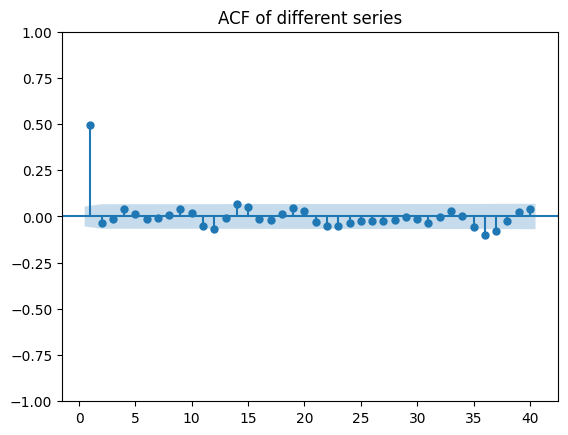

In [134]:
plot_acf(df[column_used], lags=40, zero=False)
plt.title('ACF of different series')
plt.show()

In [135]:
from statsmodels.tsa.arima.model import ARIMA

# Create the AR model
def train_ma_model(df_train, order):
    # Create the ARIMA model
    model = ARIMA(df_train[column_used], order=order)
    # Fit the model
    result = model.fit()
    print("Result for MA(%d)" % order[0])
    print(result.summary())
    return result

In [136]:
result_ma_1 = train_ma_model(df_train, (0,0,1))

Result for MA(0)
                               SARIMAX Results                                
Dep. Variable:                differ2   No. Observations:                 1040
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -2273.395
Date:                Wed, 19 Jun 2024   AIC                           4552.791
Time:                        12:51:41   BIC                           4567.632
Sample:                    02-13-2013   HQIC                          4558.421
                         - 02-07-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1783      0.134      1.331      0.183      -0.084       0.441
ma.L1          0.9978      0.006    164.488      0.000       0.986       1.010
sigma2         4.6127      0.119   

In [137]:
result_ma_2 = train_ma_model(df_train, (0,0,2))

Result for MA(0)
                               SARIMAX Results                                
Dep. Variable:                differ2   No. Observations:                 1040
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -2272.898
Date:                Wed, 19 Jun 2024   AIC                           4553.796
Time:                        12:51:41   BIC                           4573.583
Sample:                    02-13-2013   HQIC                          4561.302
                         - 02-07-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1782      0.139      1.284      0.199      -0.094       0.450
ma.L1          1.0292      0.024     42.220      0.000       0.981       1.077
ma.L2          0.0316      0.024   

In [138]:
p = LLR_test(result_ma_1, result_ma_2,1)
print('p-value:', p)

p-value: 0.481


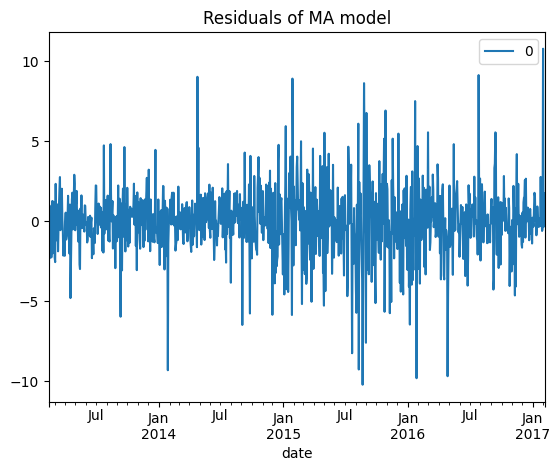

In [140]:
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import acorr_ljungbox

# Get the residuals
residuals = pd.DataFrame(result_ma_1.resid)

# Plot the residuals
residuals.plot(title="Residuals of MA model")
plt.show()


In [141]:
#Ljung-Box test
result = acorr_ljungbox(residuals, lags=[10, 20, 30], return_df=True)
print(result)

# Check for white noise
is_white_noise = result['lb_pvalue'].iloc[-1] > 0.05

if is_white_noise:
    print("The time series is likely white noise.")
else:
    print("The time series is not likely white noise")

      lb_stat  lb_pvalue
10   5.280209   0.871691
20  16.975366   0.654573
30  22.775576   0.824372
The time series is likely white noise.


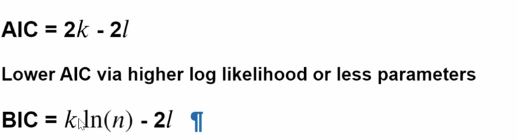

AIC

l : how strong the model fits the data, the more plicated models, better fit
k : number of parametr, for example, AR(4) has 5 parameter (+ constant)

AIC = 2k -2l as small as possible -> take model with simple, but still fit the data well

BIC ln(n)k -2l : just use for different dataset

In [68]:

# Print AIC for both models
print("AR(13) model AIC: ", result_ar_13.aic)
print("MA(1) model AIC: ", result_ma_1.aic)

AR(13) model AIC:  4617.140938091601
MA(1) model AIC:  4552.790917088323
